In [1]:
from numpy import *
from matplotlib.pylab import *
%matplotlib inline

In [37]:
def r(x,A = 1, l = 1, m = 1, k = 1,n = 2):
    return(sqrt((k-x*x/m**2)*(1+A*sin(l*x**2)))**n)

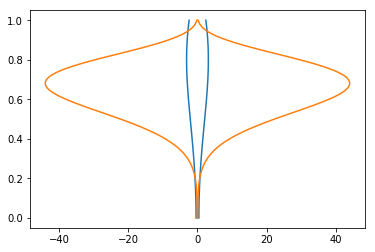

In [55]:
x = linspace(0,1,100)
n0 = 2
k = 0.4
m = 1/k
A, l = (10,2)
plot(r(x,n = n0,k = k,m = m, A = A, l = l),x)
plot(-r(x,n = n0,k = k,m = m, A = A, l = l),x,'C0')

n0 = 6
k = 0.4
m = 1/k
A, l = (10,3)
plot(r(x,n = n0,k = k,m = m, A = A, l = l),x)
plot(-r(x,n = n0,k = k,m = m, A = A, l = l),x,'C1')

In [56]:
import pickle


In [57]:
with open("data_Fullset/Fullset.pkl","rb") as f:
    data = pickle.load(f)

In [59]:
data.keys()

Index(['#Bch', 'Dsb', 'Dss', 'd_interSp', 'Vtot', 'Vh', 'Ln', 'SA', 'nPSD',
       'A1', 'A2', 'GPHN SNR', 'DiS-EMchk', 'Lneck', 'maxDneck', 'minDneck',
       'meanDneck', 'Rneck', 'Lhead', 'maxDhead', 'minDhead', 'meanDhead',
       'Ah', 'Rhead'],
      dtype='object')

(array([ 3.,  1.,  3.,  3.,  4.,  8.,  8., 15., 10.,  8., 12., 16., 14.,
        17., 22., 20., 14., 13., 18.,  6., 10., 11.,  7., 12.,  9., 10.,
         9.,  8.,  8., 11.,  3.,  4.,  9.,  5.,  8.,  7.,  4.,  3.,  0.,
         5.,  4.,  4.,  2.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  2.]),
 array([0.13040497, 0.14525956, 0.16011414, 0.17496873, 0.18982332,
        0.20467791, 0.21953249, 0.23438708, 0.24924167, 0.26409625,
        0.27895084, 0.29380543, 0.30866002, 0.3235146 , 0.33836919,
        0.35322378, 0.36807836, 0.38293295, 0.39778754, 0.41264213,
        0.42749671, 0.4423513 , 0.45720589, 0.47206048, 0.48691506,
        0.50176965, 0.51662424, 0.53147882, 0.54633341, 0.561188  ,
        0.57604259, 0.59089717, 0.60575176, 0.62060635, 0.63546094,
        0.65031552, 0.66517011, 0.6800247 , 0.69487928, 0.70973387,
        0.72458846, 0.73944305, 0.75429763, 0.76915222, 0.78400681,
        0.7988614 , 0.81371598, 0.82857057, 0.84342516, 0.85827974,
        0.87313433, 0.88798892]

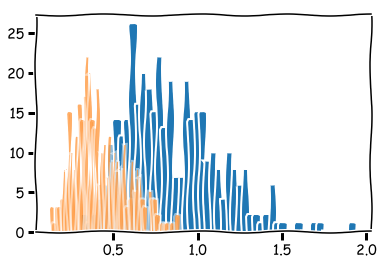

In [115]:
hist(data['Lhead'],51)
hist(data['maxDhead']/1e3,51,alpha=0.5)

(0, 1.0)

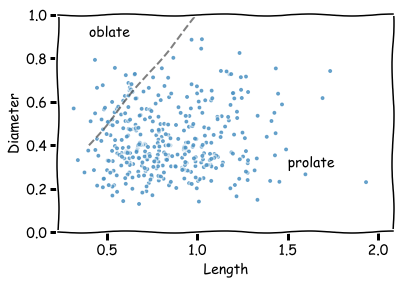

In [122]:
plot(data['Lhead'],data['maxDhead']/1e3,'.',alpha=0.5)
plot(linspace(0.4,2.),linspace(0.4,2.),'k--',alpha=0.5)
xlabel("Length")
ylabel('Diameter')
annotate('oblate',xy = (0.4,0.9))
annotate('prolate',xy = (1.5,0.3))

ylim(0,1.)

Text(0.5,3.3,'prolate')

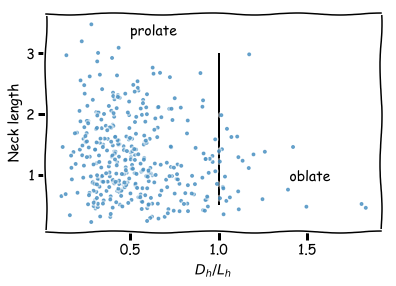

In [136]:
plot(data['maxDhead']/1e3/data['Lhead'],data['Lneck'],'.',alpha=0.5)
#plot(linspace(0.4,2.),linspace(0.4,2.),'k--',alpha=0.5)
vlines(1,0.5,3)
xlabel("$D_h/L_h$")
ylabel('Neck length')
annotate('oblate',xy = (1.4,0.9))
annotate('prolate',xy = (0.5,3.3))

#ylim(0,1.5)

In [176]:
linspace(0,1,3)

array([0. , 0.5, 1. ])

In [73]:
def ellipsoid(a= 1,b = 1, alpha=0,  np = 101):
    th = linspace(alpha,2*pi-alpha,np)
    x = a*sin(th+pi)
    y = b*cos(th+pi)
    return((x,y))

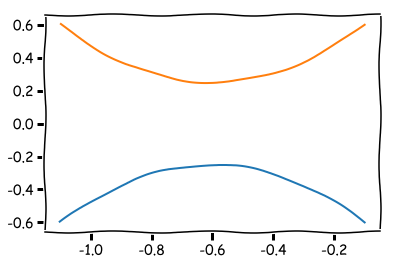

In [187]:
Ln = 1.0
D0 = 0.2
Dnmin = 0.5
Dn = 1.2
y0n = linspace(0,-Ln,100)-D0/2.0
yb = linspace(0,-Ln,3)-D0/2.0
x0 = Dnmin+(y0n-yb[1])**2/(Ln/2)**2*(Dn-Dnmin)
x0nl = y0n*0-x0/2.0
x0nr = y0n*0+x0/2.0
plot(y0n,x0nl)
plot(y0n,x0nr)

In [201]:
arange(10,0,-1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [232]:
def simplesp(D0,D1,Dn,Ln):
    db = D1/2.0#/D0
    dnb = min(Dn/D1,1)
    alpha = arcsin(dnb)
    xe,ye = ellipsoid(db,D0/2.0,alpha)
    y0n = linspace(0,-Ln,3)-D0/2.0
    x0nl = y0n*0-Dn/2.0
    x0nr = y0n*0+Dn/2.0
    x = concatenate((x0nl,xe,x0nr))
    y = concatenate((y0n,ye,y0n))
    return((x,y))

def kinksp(D0,D1,Dn,Ln,Dnmin):
    db = D1/2.0#/D0
    dnb = min(Dn/D1,1)
    alpha = arcsin(dnb)
    xe,ye = ellipsoid(db,D0/2.0,alpha)
    headbase = -D0*cos(alpha)/2.0
    y0n = linspace(0,-Ln,100)+headbase
    yb = linspace(0,-Ln,3)+headbase
    x0 = Dnmin+(y0n-yb[1])**2/(Ln/2)**2*(Dn-Dnmin)
    x0nl = y0n*0-x0/2.0
    x0nr = y0n*0+x0/2.0
    sel = arange(len(y0n),0,-1)-1
    x = concatenate((x0nl,xe,x0nr))
    y = concatenate((y0n[sel],ye,y0n))
    return((x,y))

def generatesp(i,lplot = False):
    D0 = data['Lhead'][i]
    D1 = data['maxDhead'][i]/1e3
    Dn = data['meanDneck'][i]/1e3
    Ln = data['Lneck'][i]
    sp = kinksp(D0,D1,Dn,Ln,data['minDneck'][i]/1e3)
    if lplot == True:
        plot(sp[0],sp[1],'-')
    return(sp)

In [71]:
xkcd()

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x7f2bf8fcfa90>

0.19444507400798472 0.3379438077844217


(-2, 2)

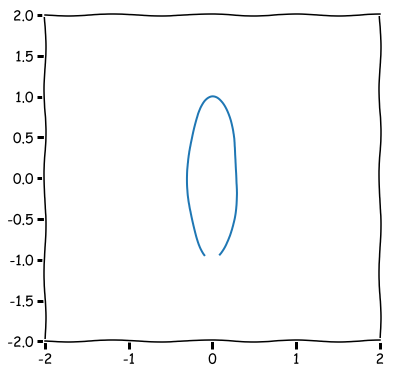

In [165]:
i,j = randint(370,size=2)
D0 = data['Lhead'][i]
D1 = data['maxDhead'][i]/1e3
db = D1/D0
Dn = data['meanDneck'][i]/1e3
Ln = data['Lneck'][i]

dnb = Dn/2.0/D1
alpha = arcsin(dnb)
elip0 = ellipsoid(db,1,alpha)

print(Dn/D0,alpha)
figure(figsize=(6,6))
plot(elip0[0],elip0[1])
xlim(-2,2)
ylim(-2,2)

0.9350389641654918 0.3892892322447228 0.23158072684768793 1.625747909230111


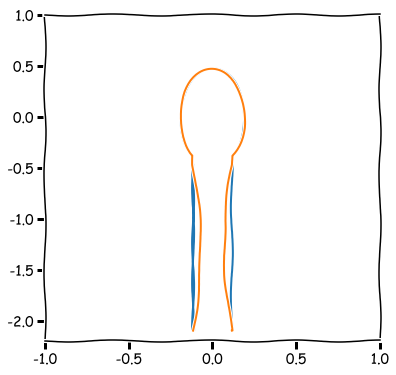

In [203]:
i,j = randint(370,size=2)
D0 = data['Lhead'][i]
D1 = data['maxDhead'][i]/1e3
Dn = data['meanDneck'][i]/1e3
Ln = data['Lneck'][i]
sp = simplesp(D0,D1,Dn,Ln)
print(D0,D1,Dn,Ln)
figure(figsize=(6,6))
plot(sp[0],sp[1])
xlim(-1,1)
ylim(min(-1,min(sp[1])*1.05),max(1,max(sp[1])*1.05))
sp = kinksp(D0,D1,Dn,Ln,data['minDneck'][i]/1e3)
plot(sp[0],sp[1],'-')

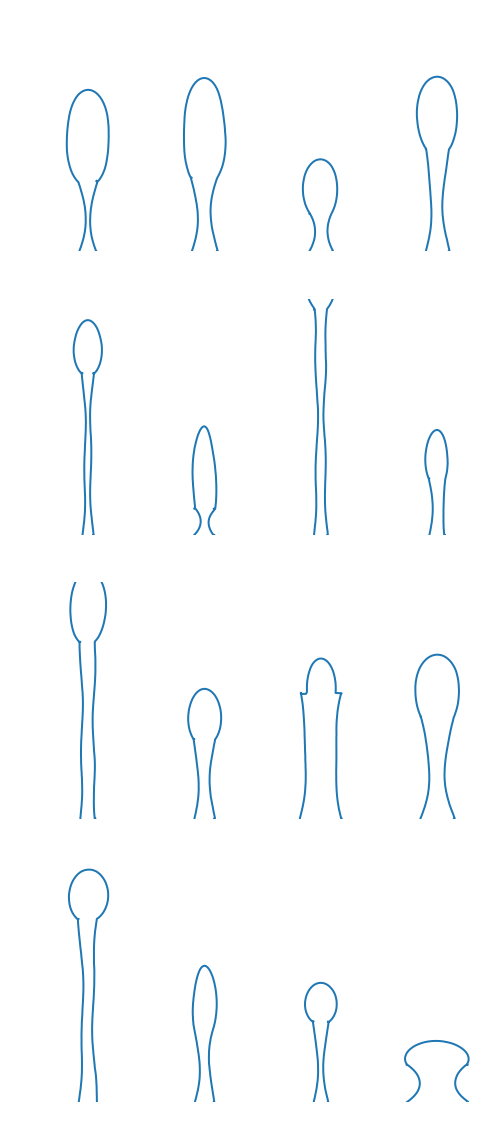

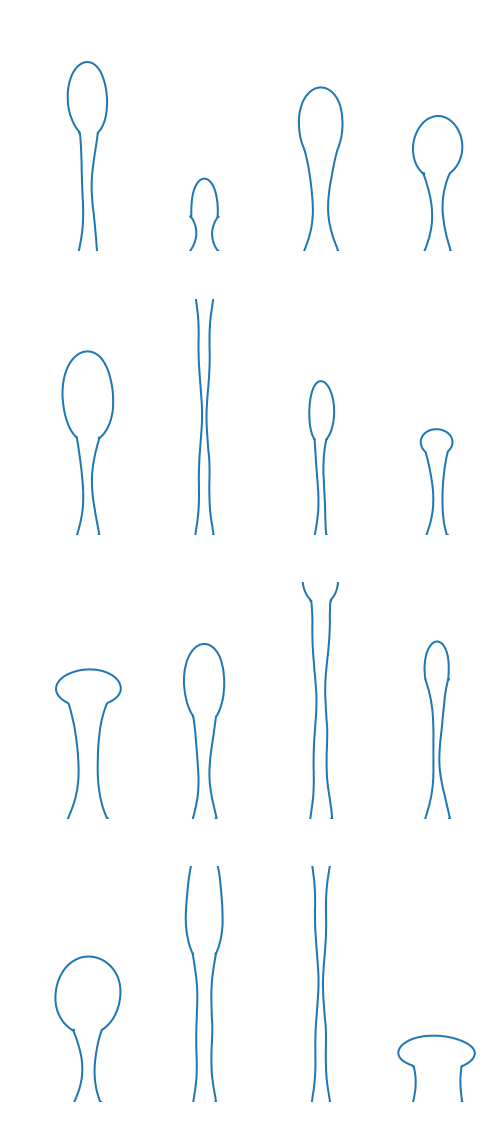

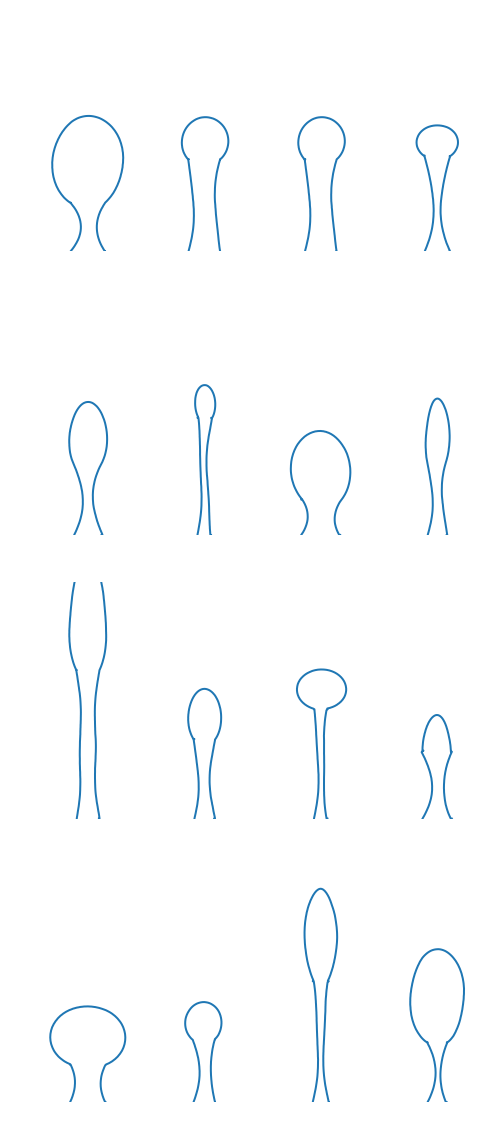

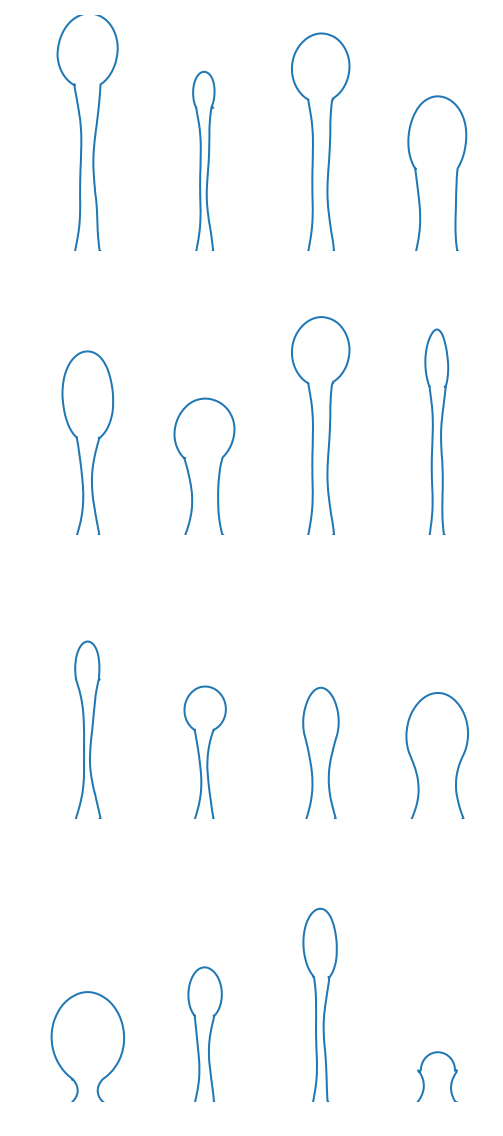

In [266]:
#figure(figsize=(2,5))
for k in range(4):
    fig,ax = subplots(4,4,figsize = (2*4,5*4))
    for i in range(4):
        for j in range(4):
            sp = generatesp(randint(170))
            ax[i,j].plot(sp[0],sp[1]-min(sp[1]))
            ax[i,j].set_xlim(-.5,.5)
            ax[i,j].set_ylim(0,max(3,max(sp[1])*1.05))
            ax[i,j].axis('off')
    fig.savefig('spines_'+str(k)+'.png')

(-2, 2)

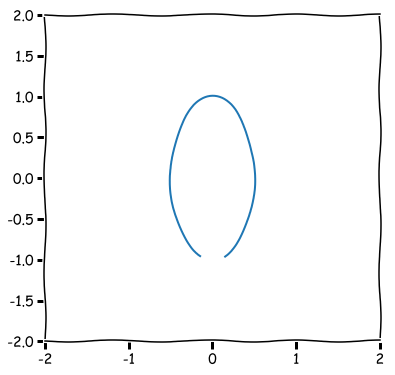

In [140]:
i,j = randint(370,size=2)
D0 = data['Lhead'].mean()
D1 = data['maxDhead'].mean()/1e3
db = D1/D0
elip0 = ellipsoid(db,1,0.3)
figure(figsize=(6,6))
plot(elip0[0],elip0[1])
xlim(-2,2)
ylim(-2,2)

(-2, 2)

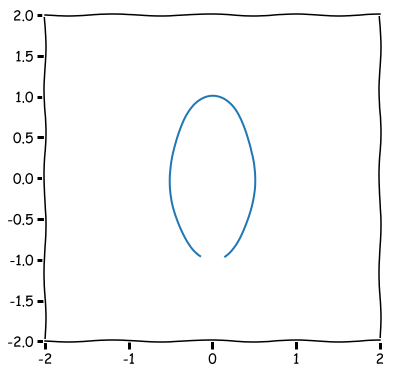

In [124]:
i,j = randint(370,size=2)
D0 = 0.6#data['Lhead'].mean()
D1 = 0.3#data['maxDhead'].mean()/1e3
db = D1/D0
elip0 = ellipsoid(db,1,0.3)
figure(figsize=(6,6))
plot(elip0[0],elip0[1])
xlim(-2,2)
ylim(-2,2)

(-2, 2)

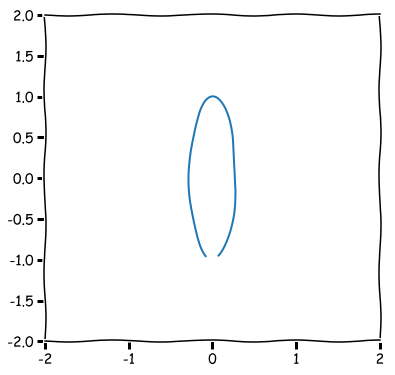

In [129]:
i,j = randint(370,size=2)
D0 = data['Lhead'][i]
D1 = data['maxDhead'][j]/1e3
db = D1/D0
elip0 = ellipsoid(db,1,0.3)
figure(figsize=(6,6))
plot(elip0[0],elip0[1])
xlim(-2,2)
ylim(-2,2)